<a href="https://colab.research.google.com/github/Vejni/Capsules_Thesis/blob/main/Capsules_CNN_Benchmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount google drive, to access the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.applications import EfficientNetB0
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import Sequence
from matplotlib import pyplot as plt
from keras.models import load_model
from keras.models import Sequential
from tensorflow import keras
from pathlib import Path
from PIL import Image
import numpy as np
%matplotlib inline

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
BATCH_SIZE = 32
EPOCHS = 50
IMG_HEIGHT = 224
IMG_WIDTH = 224

Found 739 images belonging to 3 classes.
Found 183 images belonging to 3 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1.0

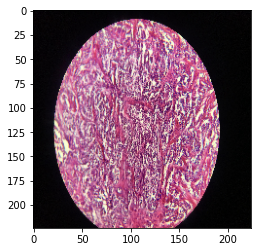

In [ ]:
training_datagen = image.ImageDataGenerator(
  keras.applications.resnet.preprocess_input,
  validation_split=0.2
)

train_generator = training_datagen.flow_from_directory(
  "./gdrive/MyDrive/Histopathological_Graded/",
  target_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE,
  color_mode="rgb",
  shuffle=True,
  class_mode="sparse",
  subset="training",
  seed=123,
)


validation_datagen = image.ImageDataGenerator(
  keras.applications.resnet.preprocess_input,
  validation_split=0.2
)

validation_generator = validation_datagen.flow_from_directory(
    "./gdrive/MyDrive/Histopathological_Graded/",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    class_mode="sparse",
    subset="validation",
    seed=123,
)

imgs, labels = next(train_generator)
plt.imshow(imgs[0].astype('uint8'))
labels[0]

# ResNet50


In [ ]:
base_model = ResNet50(weights="imagenet", include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.4)(x)
predictions = Dense(train_generator.num_classes, activation="softmax")(x)
resnet = keras.models.Model(inputs=base_model.input, outputs=predictions)

for layer in resnet.layers[:-3]:
  layer.trainable = False

resnet.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_____________________________

In [ ]:
resnet.compile(
    optimizer=keras.optimizers.Adam(),
    loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True),],
    metrics=["accuracy"],
)

resnet_history = resnet.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=train_generator.n // BATCH_SIZE,
  validation_steps=validation_generator.n // BATCH_SIZE,
  epochs=EPOCHS,
  verbose=1
)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
23/23 [==============================] - 477s 20s/step - loss: 2.7539 - accuracy: 0.3563 - val_loss: 1.1216 - val_accuracy: 0.4563
Epoch 2/50
23/23 [==============================] - 87s 4s/step - loss: 1.0884 - accuracy: 0.5172 - val_loss: 1.1507 - val_accuracy: 0.4375
Epoch 3/50
23/23 [==============================] - 87s 4s/step - loss: 1.0369 - accuracy: 0.5201 - val_loss: 0.9308 - val_accuracy: 0.5312
Epoch 4/50
23/23 [==============================] - 87s 4s/step - loss: 0.9010 - accuracy: 0.5682 - val_loss: 0.9637 - val_accuracy: 0.4875
Epoch 5/50
23/23 [==============================] - 87s 4s/step - loss: 0.9242 - accuracy: 0.5644 - val_loss: 0.9441 - val_accuracy: 0.5375
Epoch 6/50
23/23 [==============================] - 87s 4s/step - loss: 0.8276 - accuracy: 0.6168 - val_loss: 0.9177 - val_accuracy: 0.5063
Epoch 7/50
23/23 [==============================] - 87s 4s/step - loss: 0.8275 - accuracy: 0.6234 - val_loss: 0.9288 - val_accuracy: 0.4688
Epoch 8/50
23/23 [

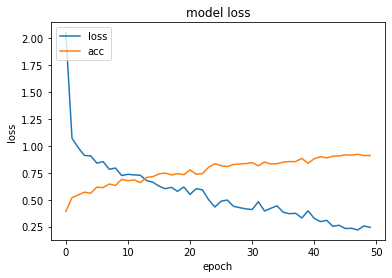

In [ ]:
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'acc'], loc='upper left')
plt.show()

In [ ]:
# Training Set
resnet.evaluate(
  train_generator,
  steps=train_generator.n // BATCH_SIZE
)
# Validation Set
resnet.evaluate(
  validation_generator,
  steps=validation_generator.n // BATCH_SIZE
)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


5/5 [==============================] - 18s 4s/step - loss: 1.2891 - accuracy: 0.5437


[1.2890856266021729, 0.543749988079071]

In [ ]:
resnet.save("./gdrive/MyDrive/ResNet50_graded_50.h5")

# EfficientNetB0


In [ ]:
base_model = EfficientNetB0(weights="imagenet", include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation="softmax")(x)
efficientnet = keras.models.Model(inputs=base_model.input, outputs=predictions)

for layer in efficientnet.layers[:-3]:
  layer.trainable = False

efficientnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, None, None, 3 7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization_1[0][0]            
____________________________________________________________________________________________

In [ ]:
efficientnet.compile(
    optimizer=keras.optimizers.Adam(),
    loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True),],
    metrics=["accuracy"],
)

efficientnet_history = efficientnet.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=train_generator.n // BATCH_SIZE,
  validation_steps=validation_generator.n // BATCH_SIZE,
  epochs=EPOCHS,
  verbose=1
)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
23/23 [==============================] - 407s 18s/step - loss: 1.3683 - accuracy: 0.3778 - val_loss: 0.9077 - val_accuracy: 0.5625
Epoch 2/50
23/23 [==============================] - 87s 4s/step - loss: 1.0039 - accuracy: 0.5405 - val_loss: 0.8722 - val_accuracy: 0.5875
Epoch 3/50
23/23 [==============================] - 86s 4s/step - loss: 0.9306 - accuracy: 0.6001 - val_loss: 0.9801 - val_accuracy: 0.5250
Epoch 4/50
23/23 [==============================] - 87s 4s/step - loss: 0.9812 - accuracy: 0.5189 - val_loss: 0.8636 - val_accuracy: 0.5875
Epoch 5/50
23/23 [==============================] - 87s 4s/step - loss: 0.8459 - accuracy: 0.6253 - val_loss: 0.9213 - val_accuracy: 0.5750
Epoch 6/50
23/23 [==============================] - 87s 4s/step - loss: 0.8589 - accuracy: 0.5947 - val_loss: 0.8730 - val_accuracy: 0.5813
Epoch 7/50
23/23 [==============================] - 86s 4s/step - loss: 0.7996 - accuracy: 0.6543 - val_loss: 1.0076 - val_accuracy: 0.4938
Epoch 8/50
23/23 [

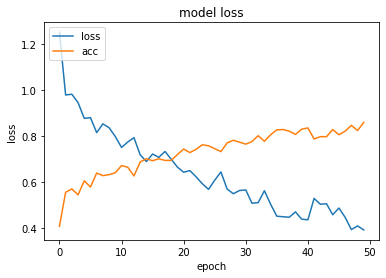

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


5/5 [==============================] - 18s 4s/step - loss: 0.9260 - accuracy: 0.6313


[0.9260460138320923, 0.6312500238418579]

In [ ]:
plt.plot(efficientnet_history.history['loss'])
plt.plot(efficientnet_history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'acc'], loc='upper left')
plt.show()

efficientnet.evaluate(
  train_generator,
  steps=train_generator.n // BATCH_SIZE
)

efficientnet.evaluate(
  validation_generator,
  steps=validation_generator.n // BATCH_SIZE
)

In [ ]:
efficientnet.save("./gdrive/MyDrive/EfficientNetB0_graded_50.h5")

# CNN


In [ ]:
# building a linear stack of layers with the sequential model
own_cnn = Sequential()

# convolutional layers
own_cnn.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
own_cnn.add(MaxPool2D(pool_size=(2,2)))

own_cnn.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
own_cnn.add(MaxPool2D(pool_size=(2,2)))
own_cnn.add(Dropout(0.25))

own_cnn.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
own_cnn.add(MaxPool2D(pool_size=(2,2)))
own_cnn.add(Dropout(0.25))

# flatten output of conv
own_cnn.add(Flatten())

# hidden layer
own_cnn.add(Dense(64, activation='relu'))
own_cnn.add(Dropout(0.4))
own_cnn.add(Dense(32, activation='relu'))
own_cnn.add(Dropout(0.3))
# output layer
own_cnn.add(Dense(3))

own_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 64)       

In [ ]:
own_cnn.compile(
    optimizer=keras.optimizers.Adam(),
    loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True),],
    metrics=["accuracy"],
)

own_cnn_history = own_cnn.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=train_generator.n // BATCH_SIZE,
  validation_steps=validation_generator.n // BATCH_SIZE,
  epochs=EPOCHS,
  verbose=1
)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
23/23 [==============================] - 91s 4s/step - loss: 68.8427 - accuracy: 0.3018 - val_loss: 1.0944 - val_accuracy: 0.4062
Epoch 2/50
23/23 [==============================] - 87s 4s/step - loss: 1.0880 - accuracy: 0.4001 - val_loss: 1.0923 - val_accuracy: 0.4625
Epoch 3/50
23/23 [==============================] - 87s 4s/step - loss: 1.0979 - accuracy: 0.3692 - val_loss: 1.0888 - val_accuracy: 0.4062
Epoch 4/50
23/23 [==============================] - 88s 4s/step - loss: 1.0634 - accuracy: 0.4111 - val_loss: 1.0815 - val_accuracy: 0.3875
Epoch 5/50
23/23 [==============================] - 88s 4s/step - loss: 1.0728 - accuracy: 0.4156 - val_loss: 1.0751 - val_accuracy: 0.4313
Epoch 6/50
23/23 [==============================] - 89s 4s/step - loss: 1.0749 - accuracy: 0.4098 - val_loss: 1.0688 - val_accuracy: 0.4500
Epoch 7/50
23/23 [==============================] - 89s 4s/step - loss: 1.0460 - accuracy: 0.4524 - val_loss: 1.0808 - val_accuracy: 0.4187
Epoch 8/50
23/23 [=

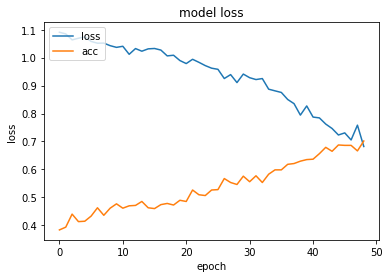

In [ ]:
plt.plot(own_cnn_history.history['loss'][1:])
plt.plot(own_cnn_history.history['accuracy'][1:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'acc'], loc='upper left')
plt.show()

In [ ]:
own_cnn.evaluate(
  train_generator,
  steps=train_generator.n // BATCH_SIZE
)

own_cnn.evaluate(
  validation_generator,
  steps=validation_generator.n // BATCH_SIZE
)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


5/5 [==============================] - 18s 4s/step - loss: 1.1731 - accuracy: 0.4375


[1.1731293201446533, 0.4375]

In [ ]:
own_cnn.save("./gdrive/MyDrive/OwnCNN_graded_50.h5")

# Capsules



* TF: https://github.com/ageron/handson-ml/blob/master/extra_capsnets.ipynb
* Keras: https://github.com/XifengGuo/CapsNet-Keras
* TF: https://github.com/naturomics/CapsNet-Tensorflow
* Pytorch: https://github.com/gram-ai/capsule-networks
* Traffic Sign Classifier: https://github.com/thibo73800/capsnet-traffic-sign-classifier